# Animal classification
https://www.kaggle.com/datasets/alessiocorrado99/animals10?resource=download

This dataset contains 10 classes of animals. TIt contains about 28K medium quality animal images belonging to 10 categories: dog, cat, horse, spyder, butterfly, chicken, sheep, cow, squirrel, elephant.

Each class has about 2k to 5k images.

In [1]:
import tensorflow  as  tf
from  tensorflow  import  keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
from sklearn.model_selection import train_test_split
import sklearn

import numpy as  np
import matplotlib.pyplot  as  plt
import os
import cv2
import random
import cv2 as cv
import pandas  as  pd
import tqdm as tqdm


config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

#print the number of GPU

print ( "Num GPUs Available: " ,  len ( tf.config.experimental.list_physical_devices ( 'GPU' )))

2022-12-29 00:54:27.148738: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-29 00:54:27.610244: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-12-29 00:54:27.760914: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-12-29 00:54:28.620607: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

Num GPUs Available:  1


2022-12-29 00:54:31.011745: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-29 00:54:31.012641: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-29 00:54:31.012759: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-29 00:54:31.013335: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4117 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6
2022-12-29 00:54:31.015288: I tensorflow/stream_executor/cuda/cuda_

In [7]:
path = "./dataset"

#for each folder in the dataset folder, split the data into training and test set

train_x = []
train_y = []
test_x = []
test_y = []

dizionario = {'cane': 0, 'cavallo': 1, 'elefante': 2, 'farfalla': 3, 'gallina': 4, 'gatto': 5, 'mucca': 6, 'pecora': 7, 'ragno': 8, 'scoiattolo': 9}

numSamplesPerClass = 500


for folder in tqdm.tqdm(os.listdir(path)):
    images = []
    labels = []
    cont = 0
    for img in os.listdir(os.path.join(path, folder)):
        if cont == numSamplesPerClass:
            break
        cont += 1
        #the image is in color
        img_array = cv2.imread(os.path.join(path, folder, img), cv2.IMREAD_COLOR)
        #resize the image
        new_array = cv2.resize(img_array, (150, 150))
        #append the image to the list
        images.append(new_array)
        #append the label to the list
        labels.append(dizionario[folder])
    #split the data into training and test set
    train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)
    #append the training and test set to the list
    train_x.extend(train_images)
    train_y.extend(train_labels)
    test_x.extend(test_images)
    test_y.extend(test_labels)

#convert the list to numpy array
train_x = np.array(train_x)
train_y = np.array(train_y)

test_x = np.array(test_x)
test_y = np.array(test_y)

#map the label to the class name

#rescale the data
train_x = train_x / 255.0
test_x = test_x / 255.0

#split the training set into training and validation set
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.2, random_state=42)

#convert the labels to one hot encoding
train_y = keras.utils.to_categorical(train_y, 10)
test_y = keras.utils.to_categorical(test_y, 10)
val_y = keras.utils.to_categorical(val_y, 10)


print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)
print(val_x.shape)
print(val_y.shape)








#tempo di esecuzione: 1min 30sec


 70%|███████   | 7/10 [00:03<00:01,  2.74it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
100%|██████████| 10/10 [00:05<00:00,  1.91it/s]


(3200, 150, 150, 3)
(3200, 10)
(1000, 150, 150, 3)
(1000, 10)
(800, 150, 150, 3)
(800, 10)


In [2]:
path = "./dataset"

#load the data from the dataset and use flow_from_directory and split the data into training and test set

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)


train_generator = train_datagen.flow_from_directory(
        path,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical',
        subset='training')

validation_generator = train_datagen.flow_from_directory(
        path,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical',
        subset='validation')





Found 20947 images belonging to 10 classes.
Found 5232 images belonging to 10 classes.


In [3]:
base_model = keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
for layer in base_model.layers:
    layer.trainable = False

add_model = keras.Sequential()
add_model.add(Flatten(input_shape=base_model.output_shape[1:]))
add_model.add(Dense(256, activation='relu'))
add_model.add(Dense(10, activation='softmax'))

model = keras.Model(inputs=base_model.input, outputs=add_model(base_model.output))
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(lr=1e-5), metrics=['accuracy'])

model.summary()

2022-12-28 18:20:40.797838: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-28 18:20:40.798065: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-28 18:20:40.798174: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-28 18:20:40.798352: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-28 18:20:40.798462: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from S

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

/home/theshadow/.local/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [4]:
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(lr=0.0001), metrics=['accuracy'])


early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.00005,
    patience=5,
    verbose=1,
    restore_best_weights=True,
)

lr_scheduler = keras.callbacks.ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=5,
    min_lr=1e-7,
    verbose=1,
)


callbacks = [
    early_stopping,
    lr_scheduler,
]


In [5]:
history = model.fit(train_generator, epochs=100, batch_size=32, validation_data=validation_generator, callbacks=callbacks, verbose=1)

Epoch 1/100


2022-12-28 18:20:43.959738: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2022-12-28 18:20:45.036606: W tensorflow/stream_executor/gpu/asm_compiler.cc:111] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

You may not need to update to CUDA 11.1; cherry-picking the ptxas binary is often sufficient.
2022-12-28 18:20:45.037658: W tensorflow/stream_executor/gpu/asm_compiler.cc:230] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.6
2022-12-28 18:20:45.037667: W tensorflow/stream_executor/gpu/asm_compiler.cc:233] Used ptxas at ptxas
2022-12-28 18:20:45.037695: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] UNIMPLEMENTED: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be 

200/200 [==============================] - 18s 65ms/step - loss: 1.1222 - accuracy: 0.6394 - val_loss: 0.7630 - val_accuracy: 0.7606 - lr: 1.0000e-04
Epoch 2/100
200/200 [==============================] - 13s 63ms/step - loss: 0.6028 - accuracy: 0.8106 - val_loss: 0.6680 - val_accuracy: 0.7856 - lr: 1.0000e-04
Epoch 3/100
200/200 [==============================] - 13s 63ms/step - loss: 0.4469 - accuracy: 0.8700 - val_loss: 0.6261 - val_accuracy: 0.7900 - lr: 1.0000e-04
Epoch 4/100
200/200 [==============================] - 13s 64ms/step - loss: 0.3504 - accuracy: 0.9000 - val_loss: 0.6084 - val_accuracy: 0.7937 - lr: 1.0000e-04
Epoch 5/100
200/200 [==============================] - 13s 63ms/step - loss: 0.2778 - accuracy: 0.9303 - val_loss: 0.5618 - val_accuracy: 0.8194 - lr: 1.0000e-04
Epoch 6/100
200/200 [==============================] - 13s 63ms/step - loss: 0.2166 - accuracy: 0.9528 - val_loss: 0.5616 - val_accuracy: 0.8156 - lr: 1.0000e-04
Epoch 7/100
200/200 [===================

50/50 [==============================] - 3s 51ms/step - loss: 0.5876 - accuracy: 0.8275
[0.5875987410545349, 0.8274999856948853]
63/63 [==============================] - 4s 68ms/step - loss: 0.5372 - accuracy: 0.8250
[0.5372493863105774, 0.824999988079071]


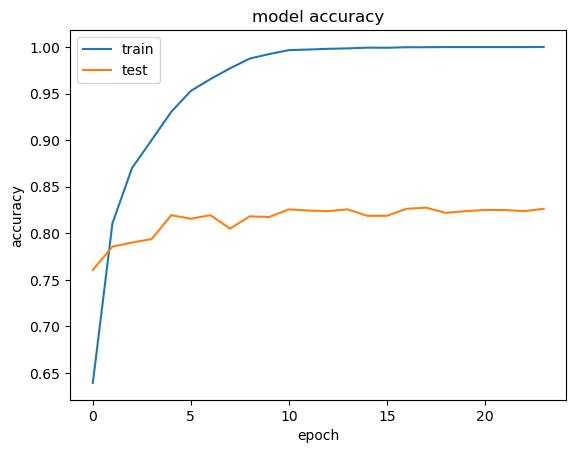

In [6]:
print(model.evaluate(val_x, val_y))
print(model.evaluate(test_x, test_y))

#plot the accuracy and loss
plt.plot(history.history['accuracy'])

plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')

plt.ylabel('accuracy')

plt.xlabel('epoch')

plt.legend(['train', 'test'], loc='upper left')

plt.show()


In [10]:
#create a new model 
model2 = keras.Sequential()

#use conv2d, maxpooling2d, dropout and batchnormalization
model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(0.2))
model2.add(keras.layers.BatchNormalization())

model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(0.2))

model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(0.2))

model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(0.2))

model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(Dense(10, activation='softmax'))


model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 74, 74, 32)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 74, 74, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)      

In [11]:
model2.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(lr=0.0001), metrics=['accuracy'])

early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.00005,
    patience=5,
    verbose=1,
    restore_best_weights=True,
)

lr_scheduler = keras.callbacks.ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=5,
    min_lr=1e-7,
    verbose=1,
)


callbacks = [
    early_stopping,
    lr_scheduler,
]
history2 = model2.fit(train_x, train_y, epochs=100, batch_size=32, validation_data=validation_generator, callbacks=callbacks, verbose=1)

/home/theshadow/.local/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/100
100/100 [==============================] - 5s 51ms/step - loss: 2.2814 - accuracy: 0.1753 - val_loss: 2.2809 - val_accuracy: 0.1416 - lr: 1.0000e-04
Epoch 2/100
100/100 [==============================] - 5s 48ms/step - loss: 2.0068 - accuracy: 0.2809 - val_loss: 2.2240 - val_accuracy: 0.2292 - lr: 1.0000e-04
Epoch 3/100
100/100 [==============================] - 5s 49ms/step - loss: 1.8319 - accuracy: 0.3478 - val_loss: 2.1692 - val_accuracy: 0.2160 - lr: 1.0000e-04
Epoch 4/100
100/100 [==============================] - 5s 49ms/step - loss: 1.7224 - accuracy: 0.3997 - val_loss: 2.0765 - val_accuracy: 0.2796 - lr: 1.0000e-04
Epoch 5/100
100/100 [==============================] - 5s 50ms/step - loss: 1.5922 - accuracy: 0.4437 - val_loss: 2.0373 - val_accuracy: 0.2689 - lr: 1.0000e-04
Epoch 6/100
100/100 [==============================] - 5s 49ms/step - loss: 1.4746 - accuracy: 0.4947 - val_loss: 2.1867 - val_accuracy: 0.2269 - lr: 1.0000e-04
Epoch 7/100
100/100 [=============

25/25 [==============================] - 0s 7ms/step - loss: 1.6209 - accuracy: 0.4775
[1.620904803276062, 0.47749999165534973]
32/32 [==============================] - 0s 8ms/step - loss: 1.6258 - accuracy: 0.4940
[1.6257696151733398, 0.49399998784065247]
164/164 [==============================] - 3s 16ms/step - loss: 0.9385 - accuracy: 0.7047
[0.9384831190109253, 0.704701840877533]


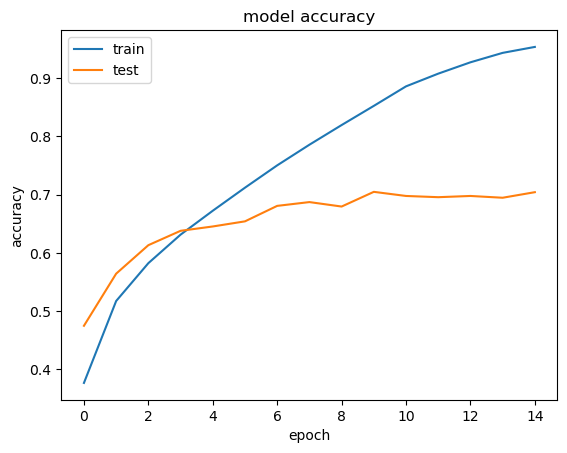

In [9]:
#compute the accuracy and loss
print(model2.evaluate(val_x, val_y))
print(model2.evaluate(test_x, test_y))
print(model2.evaluate(validation_generator))

#plot the accuracy and loss
plt.plot(history2.history['accuracy'])

plt.plot(history2.history['val_accuracy'])

plt.title('model accuracy')

plt.ylabel('accuracy')

plt.xlabel('epoch')

plt.legend(['train', 'test'], loc='upper left')

plt.show()
